# ECH 60 Spring 2020 week 3
&copy; Harishankar Manikantan, Chemical Engineering, UC Davis 

**[(3.1) Statistics and Data Analysis](#stat) (Monday)**
*  [Measures of spread](#measures) <br>
*  [Distributions and histograms](#hist) <br>

**[(3.2) Pandas: a powerful data platform](#pandas) (Monday)**
*  [Introduction to data frames](#df) <br>
*  [A real example: the data science of lead in lipsticks!](#lipstick) <br>


**[(3.3) Systems of Linear Equations](#lineq) (Wednesday, Friday)**
*  [Gauss Elimination](#Gauss) <br> 
*  [Pivoting: choosing the right row](#GaussPiv) <br> 
*  [Gauss-Jordan: Gauss on steroids!](#GaussJ) <br> 
*  [LU Decomposition](#LU) <br> 
*  [Computational Cost](#cost) <br>

**[Practice problems](#exer)**


<a id='stat'></a>

## (3.1) Statistics and Data Analysis

We now know how to assign, extract, organize, save, and visualize numbers. Statistics and related tools let us analyze numbers and generate meaningful insights from large amounts of data. Python has many inbuilt features that makes it one of the most popular (and powerful) tools for data analysis. We will learn about some of the basic statistical tools, and then introduce the powerful `pandas` framework.

<a id='measures'></a>



### Measures of spread

The standard measures of data are straightforward in python. For example, the minimum and maximum values of an array are directly obtained via the inbuilt `min()` and `max()` (no need for `numpy`). The arithmetic mean (or simply 'the mean') is the sum of all data points divided by the number of data points. That's an easy implementation with a loop. Alternatively, one could also use the `sum` and `len` functions to calculate the sum of all elements and the length of an array, so the mean would be:

In [1]:
# find mean of a 1D array d
find_mean=lambda d: sum(d)/len(d)

Test it with an array of your choice. What about the median? Algorithmically, this would require 'sorting' the array in ascending order, and find the middle value (if `len` is odd), or the mean of the middle values (if `len` is even). 

NumPy has an inbuilt arithmetic mean and median calculators `numpy.mean` and `numpy.median`. NumPy's functions are faster and more general than our simple function defined above. For instance, you can directly feed in a 2D (or 3D or higher dimensional) array and ask NumPy to calculate means or medians along a specific direction by providing the axis as an argument. This is extremely powerful when we want to calculate statistics of measured 2D/3D data:

In [2]:
import numpy as np

A=np.array([[1,2],[3,4]])
print(A)
print('Mean of all elements:',np.mean(A))
print('Mean along axis 0 (rows):',np.mean(A,0))
print('Mean along axis 1 (column):',np.mean(A,1))

[[1 2]
 [3 4]]
Mean of all elements: 2.5
Mean along axis 0 (rows): [2. 3.]
Mean along axis 1 (column): [1.5 3.5]


The mean (or other 'center' measures like median or mode) only tells us the most likely or most centered value. To get a sense of the 'spread', we need higher moments of statistical measures. The most common is standard deviation, which is defined as the root-mean-square sum of residuals (difference from mean) of all values in an array. Try writing a simple code for this. Numpy has a general version `std()`, with choice of averaging direction like with the mean. Same thing with the variance (or the square of teh standard deviation): use NumPy's `var()`.

To see these in action, let's play with the temperature data set from last week. To get a sense of what the data looks like, let's pick a 1D slice and plot the data first:

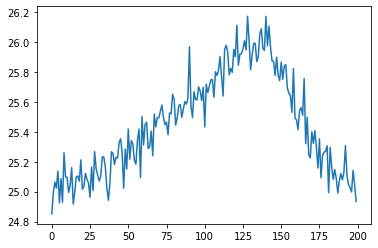

In [3]:
    temp_data=np.loadtxt("temperature.csv", delimiter=",")

    import matplotlib.pyplot as plt
    plt.plot(temp_data[20,:]) # pick one column
    plt.show()

You can calculate the mean of this dataset directly using `np.mean(temp_data[20,:])`. Or even better, recognize that this requires averaging along a column (corresponding to the `:` that we used to slice the array) and therefore we could use `np.mean(temp_data,1)[20]` to get the 21st element in the column-wise mean:

In [4]:
np.mean(temp_data,1)[20]

25.45062297775588

Same thing with the median. Try it. These measures give you the 'center' of the data in some sense. To see how varied the rest of the data is relative to the mean, find the standard deviation or variance:

In [5]:
np.std(temp_data,1)[20]

0.3327593142754834

Now compare this against the column slice `temp_data[:,190]`. See how the plot looks, and try to make sense of what a 'small' or 'large' standard deviation means.

When we start doing line fits and regression, these measures and their relatives will differentiate between a 'good' fit vs a bad 'fit'.

<a id='hist'></a>

### Distributions and histograms

In probability theory and statistics, a distribution is a function that provides the probabilities of occurrence of a particular data point in a measurement or experiment. An easy way to visualize distributions of data sets are **histograms** or bar graphs. NumPy's `histogram` generates two arrays, corresponding to the number of times a value repeats and the 'bin' boundaries:

In [6]:
np.histogram(temp_data[20,:])

(array([ 7, 36, 26, 23, 25, 22, 16, 21, 18,  6]),
 array([24.85101181, 24.98302908, 25.11504635, 25.24706362, 25.37908089,
        25.51109816, 25.64311543, 25.7751327 , 25.90714997, 26.03916724,
        26.17118451]))

You can control the bin number by providing it as an argument: try `np.histogram(temp_data[20,:],5)` or `np.histogram(temp_data[20,:],20)` to get frequency counts in 5 or 20 bins.

MatPlotLib's histogram function works in the same way, and takes the following form `plt.histogram(dataarray)`. This function additionally plots the data.

For example, we could draw a histogram of row 20 of `temp_data` as follows:

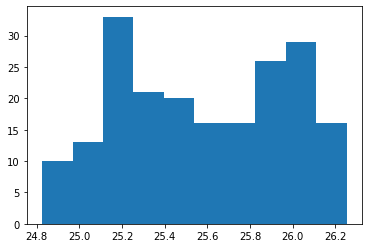

In [7]:
plt.hist(temp_data[0,:])
plt.show()

You can embellish this by providing edgecolors so each bar stands out, by providing a bin number so you control the number of bars, and you can plot multiple sets of data to compare. And the same rules for labeling and titles etc as with normal plots apply. For example:

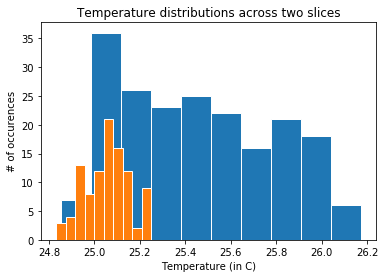

In [8]:
plt.hist(temp_data[20,:],10,edgecolor='w')
plt.hist(temp_data[:,190],10,edgecolor='w')
plt.title('Temperature distributions across two slices')
plt.xlabel('Temperature (in C)')
plt.ylabel('# of occurences')
plt.show()

This clearly shows the difference in spread between those two slices! There are many more formatting modifications one can do with histograms (e.g. stacking, horizontal bars, grouped bars): read [MatPlotLibs's official documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html) or look in the [gallery](https://matplotlib.org/3.2.1/gallery/index.html) for help and inspiration.

<a id='pandas'></a>




## (3.2) Pandas

Pandas is a handy and powerful python library for data analysis and manipulation. It's short for PANel DAta Structure (and it keeps up with the python animal pun theme!). Pandas is extremely popular in modern data science and there are countless online examples of 'big' data manipulations using pandas. Given that most industrial jobs nowadays look for some kind of data savviness, we will briefly introduce the core principles of pandas. You can teach yourself more advanced features quite easily once you know the basics, or talk to me and I can provide links to external tutorials. 

<a id='df'></a>




### Inroduction to data frames



Pandas essentially creates a new type of python object with rows and columns called a 'data frame'. Data frames look very similar to tables (like in Excel or any other common word processing software), and it is much easier to work with these tables without having to loop through indices. And pandas can handle different data types (strings, integers, combinations) quite easily.

First, we import `pandas` (a common nickname is `pd`; as usual, this is optional)

In [9]:
import pandas as pd

Once that's imported, you can quickly transform any list to a data frame. For example, this list of strings becomes the data frame named `states_data` using `pd.DataFrame()`:

In [10]:
my_list = ['California', 'Nevada', 'Colorado', 'Illinois',  'New York', 'Maryland'] 
  
# convert list to dataframe
states_data= pd.DataFrame(my_list) 

Viewing the data then doesn't require the `print` statement: simply enter the name of the dataframe and execute:

In [11]:
states_data

,0
0,California
1,Nevada
2,Colorado
3,Illinois
4,New York
5,Maryland


You can see the row and column numbers, starting from 0 as expected. The power of pandas comes from beind able to give (and use) names to row and columns. To do this, we must supply a 'dictionary' instead of a list: 

In [12]:
my_dict = {'State':['California', 'Nevada', 'Colorado', 'Illinois',  'New York', 'Maryland']}

Dictionaries are lists with 'headers' (the string 'State') in this case. Notice the colon and curly braces. Converting this dictionary to a data frame and viewing it gives:

In [13]:
states_data= pd.DataFrame(my_dict) 
states_data

,State
0,California
1,Nevada
2,Colorado
3,Illinois
4,New York
5,Maryland


That looks even more like an Excel table. Let's add more information, say the capital and the area of the state. this is easy in the dicionary format: simply separate each set of data with commas.

In [14]:
my_dict = {'State':['California', 'Nevada', 'Illinois', 'Colorado', 'New York', 'Maryland'],
          'Capital':['Sacramento','Carson City','Springfield', 'Denver','Albany', 'Annapolis'],
          'Area (in sq. miles)':[163696, 110567,57915,104185,54556,12407]}

The last list (corresponding to area) is filled with integers, so we don't need quotes on each entry.

In [15]:
states_data= pd.DataFrame(my_dict) 
states_data

,State,Capital,Area (in sq. miles)
0,California,Sacramento,163696
1,Nevada,Carson City,110567
2,Illinois,Springfield,57915
3,Colorado,Denver,104185
4,New York,Albany,54556
5,Maryland,Annapolis,12407


You can see how panda data frames look better formatted than simple arrays. But the powers of panda go beyond looking nice. For example, you can view only the first 3 rows by calling `states_data[:3]`. Or do more complicated slices exactly like you would do with arrays. Try `states_data[:3]`. 

Note that 2D panda data frames only have one index, corresponding to the row number. Column indices are now replaced by the header, whihc makes accessing columns even easier. For example, you would slice just the capitals columns by saying:

In [16]:
states_data['Capital']

0     Sacramento
1    Carson City
2    Springfield
3         Denver
4         Albany
5      Annapolis
Name: Capital, dtype: object

The output is still a data frame object, which means you can logically extract data directly from this. For example, we can easily select the states with an area under 55000 square miles using:

In [17]:
states_data[states_data['Area (in sq. miles)']<55000]

,State,Capital,Area (in sq. miles)
4,New York,Albany,54556
5,Maryland,Annapolis,12407


Make sure to use the exact string of the header. 

Pandas is even better with importing csv files directly into data frames. And there are many more manipulations once can do, to plot, sort and filter directly from within pandas. We will explore some of these options with a real FDA data set below.

<a id='lipstick'></a>




### Data science of lead in lipsticks

The US Food and Drug Administration (FDA) conducted a detailed study of lead content in major lipsticks between 2009 and 2012 in an attempt to test the safety of products in the market. Details of the study and their data can be [viewed here](https://www.fda.gov/cosmetics/cosmetic-products/limiting-lead-lipstick-and-other-cosmetics#reference1). We will analyze some of the trends from the FDA data set, motivated by similar analyses by [Prof. Kristin Sainani at Stanford](https://youtu.be/nlKIT-_b2jU) and [Prof. Lorena Barba at George Washington University](https://github.com/engineersCode/EngComp). The latter link is a fantastic resource for interested students to learn more advanced python data analysis.

For our purposes, the data set is provided in the file FDA2012-lipstickdata.csv. First, try opening the file outside python to get a sense of the how the data is laid out. You will notice that there is a header row with titles like 'Brand' and 'Parent company'. If you were using NumPy's `loadtxt` to import this data, you would have to be careful to skip this row. And, the data types are different (mixture of strings, ints, and floats) which you would force you to import columns individually (see tutorial 2, practice problems 5 and 6). Something like `np.loadtxt("FDA2012-lipstickdata.csv",delimiter=',',usecols=[3],skiprows=1)` would skip the header row and import only the third column.

Instead, pandas takes care of all this directly! And even names the columns with the appropriate headers extracted from the csv file:

In [18]:
lead2012 = pd.read_csv("FDA2012-lipstickdata.csv")
lead2012

,Sample #,Brand,Parent company,Lead (ppm)
0,1,Maybelline,L'Oreal USA,7.190
1,2,L'Oreal,L'Oreal USA,7.000
2,3,NARS,Shiseido,4.930
3,4,Cover Girl Queen,Procter & Gamble,4.920
4,5,NARS,Shiseido,4.890
...,...,...,...,...
395,396,M.A.C,Estee Lauder,0.030
396,397,Lori Anne,Mood Magic,0.030
397,398,Clinique,Estee Lauder,0.026
398,399,L'Oreal,L'Oreal USA,0.026


You will see that there are 400 rows of data, and pandas has organized it with appropriate row headers etc. Like before, you can slice to view any subset of the rows: for example, try `lead2012[5:300:30]` to view every 30th entry between the 5th and 300th entry. 

Let's first see how many of each brand were studied. You can count number of repeated entries using the `values_counts` operation. It's easy if we first create a variable with data from just the 'Brand' column:

In [19]:
# new variable with just Brand info
brands=lead2012['Brand']

# count repeated entries in this column
brands_count=brands.value_counts()

# display entry count
print(brands_count)

M.A.C                          41
Clinique                       34
Revlon                         33
L'Oreal                        29
Lancome                        25
Mary Kay                       25
Estee Lauder                   25
Maybelline                     23
Avon                           20
Stargazer                      18
Cover Girl                     14
Chanel                         11
Almay                           8
Victoria's Secret               7
Bobbi Brown                     7
NARS                            6
Cover Girl Queen Collection     6
Elizabeth Arden                 6
Iman Cosmetics                  6
Clarins                         5
BeneFit                         5
Rimmel London                   5
Fashion Fair                    5
Estee Lauder Prescriptives      5
Wet 'n' Wild                    4
Burt's Bees                     4
Estee Lauder Origins            4
Shiseido                        3
Dior                            3
Sonia Kashuk  

That's useful, but even better if we can visualize this. Pandas plots without explicitly using pyplot, but it's always a good idea to import pyplot so we have more control over the figure.

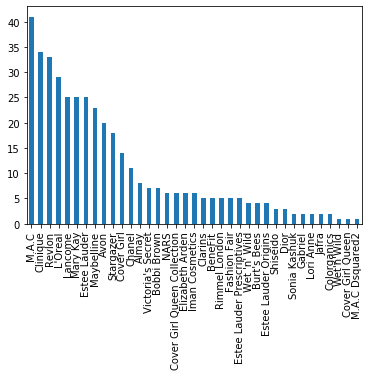

In [20]:
import matplotlib.pyplot as plt

brands_count.plot.bar()
plt.show()

Pandas automatically picks the associated string as the x-labels! You can control the figure size by providing a `figsize` option: try `brands_count.plot.bar(figsize=(10,5))`. You can have horizontal bars instead: try `brands_count.plot.barh()`. And you can provide lavels to the axes and a title. Try it.

Now let's play with the ppm measurements. Let's first look at the distribution of values that FDA recorded. Fort this, first create a new data object and then draw a histogram:

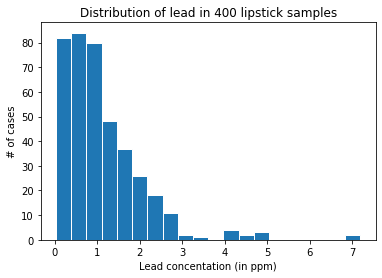

In [21]:
# new variable containing only ppm info: use correct string header
ppm=lead2012['Lead (ppm)']

plt.hist(ppm,20,edgecolor='white')

# making the plot look good
plt.title('Distribution of lead in 400 lipstick samples')
plt.xlabel('Lead concentation (in ppm)')
plt.ylabel('# of cases')
plt.show()

Looks like a spread of values under 8 ppm, with the majority under 2 ppm. Try manipulating the number of bins in the `hist` command.


Turns out all of these are within safety regulations set by FDA. However, let's say we wanted to see which ones had more than 4 ppm (this is not criticizing any brand, just pointing out what the FDA data shows!). With pandas, this is easy:

In [22]:
lead2012[ppm>4]

,Sample #,Brand,Parent company,Lead (ppm)
0,1,Maybelline,L'Oreal USA,7.19
1,2,L'Oreal,L'Oreal USA,7.00
2,3,NARS,Shiseido,4.93
3,4,Cover Girl Queen,Procter & Gamble,4.92
4,5,NARS,Shiseido,4.89
5,6,L'Oreal,L'Oreal USA,4.45
6,7,L'Oreal,L'Oreal USA,4.41
7,8,Cover Girl,Procter & Gamble,4.28
8,9,Maybelline,L'Oreal USA,4.23
9,10,Stargazer,Stargazer,4.12


You can arrange part of this information into a counted object and plot bar graphs to visualize the number of times each brand appears with ppm greater than 4:

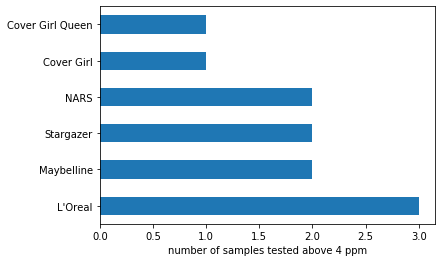

In [23]:
brands_above4=brands[ppm>4]
brands_count_above4=brands_above4.value_counts()

brands_count_above4.plot.barh()
plt.xlabel('number of samples tested above 4 ppm')
plt.show()

These examples illustrate the user-friendliness and power of pandas. For our purposes, this overview is sufficient. For curious users, there are tons of free online tutorials with advanced data science example using python and pandas. If you have specific questions beyond this level, talk to me and I can provide additional material. 

<a id='lineq'></a>



## (3.3) Systems of linear equations

Systems of linear algebraic equations arise in every aspect of engineering calculations. For example, the 'response' and forcing' are linearly realted in heat flow, porous media percolation, electrical circuits, electromagnetism, elasticity theory etc. More generally, numerical methods in later parts of the course (with regression, deifferential equations, etc) rely on being able to 'invert' or solve a set of couple algebraic equations. In many problems, the memory and time requirements can be high (although this might not be immediately obvious with most modern computers), and efficient fast solutions of linear systems can be key to optimally solving these problems.


The standard notation for a system of $n$ equations with $n$ unknowns is as follows (we will use python's numbering system going from 0 to n-1 to avoid confusion):

$$\begin{matrix} A_{00}x_0 + A_{01}x_1 + ... + A_{0,n-1}x_{n-1} = b_0\\A_{10}x_0 + A_{11}x_1 + ... + A_{1,n-1}x_{n-1} = b_1 \\ .\\.\\.\\A_{n-1,0}x_0 + A_{n-1,1}x_1 + ... + A_{n-1,n-1}x_{n-1} = b_{n-1}\end{matrix}$$

Here, $x_0, x_1, ..., x_{n-1}$ are the n unknown quantities and the coefficients $A_{ij}$ and constants $b_j$ are all known. In matrix notation, this can be rewritten as 

$$\begin{bmatrix} A_{00} & A_{01} & ... & A_{0,n-1}\\A_{10} & A_{11} & ... & A_{1,n-1} \\ . & & &. \\. & & \ddots&. \\.& & & .\\A_{n-1,0} & A_{n-1,1} & ... & A_{n-1,n-1}\end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\ .\\.\\.\\ x_{n-1}  \end{bmatrix}= \begin{bmatrix} b_0 \\ b_1 \\ .\\.\\.\\ b_{n-1}  \end{bmatrix}$$

Or, in short hand, ${\bf A x =b}$. Here, ${\bf A}$ is a $n \times n$ matrix with all entries known, ${\bf b}=(b_0, b_1, ..., b_{n-1}) $ is a column vector with all entries known, and ${\bf x}=(x_0, x_1, ..., x_{n-1} )$ is a column vector of the unknowns we are after.

We know from linear algebra that the solution can be directly obtained by premultipying both side with the matrix inverse of ${\bf A}$ and noting that ${\bf A A}^{-1}={\bf I} $, where ${\bf I}$ is the identity matrix. This means that ${\bf x = A}^{-1}{\bf b}$, and so computing the matrix inverse and performing a matrix-vector operation should give us the solution.

However, calculating the inverse of a matrix can be a computationally expensive operation if the matrix is large. When we get to numerical solutions of differential equations, we will encounter matrices with hundreds if not thousands of rows and columns, and this operation can be time-consuming. Although python has inbuilt routines to efficiently calculate inverses (and we will see these later), it's valuable to learn the algorithmic steps in obtaining the solution to such a standard linear algebraic problem. 

The most common way to solve such a system is by manipulating the system to an equivalent system which is more easily solved. The classic methods that use this trick are Gauss elimination, LU decomposition, and more specific versions of either.

<a id='Gauss'></a>



### Gauss elimination

Gauss elimination is the most common and direct way to solve a matrix system. It involves a series of algortihmic manipulations that convert the matrix to a triangular (or 'echelon') form, and then back-substitutes equation by equation to get the final solution. In the following, we will see every step in action, which will help us build the whole Guass elimination code in the end.

Consider the system of 3 equations (so n=3):
$$\begin{matrix} 4x_0 -2x_1 + x_2 = 11\\-2x_0 + 4x_1 -2x_2 = -16 \\x_0 -2x_1 +4x_2 = 17\end{matrix}$$
In matrix form, this system is:
$$\begin{bmatrix} 4 & -2  & 1 \\-2 & 4 & -2 \\1 & -2 & 4 \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 11 \\ -16 \\ 17 \end{bmatrix}$$

The objective of Gauss elimination is to somehow convert this matrix to a triangular form using linear transformations of the original matrix, so it looks like

$$\begin{bmatrix} A_{00} & A_{01}  & A_{02} \\0 & A_{11} & A_{12} \\0 & 0 & A_{22} \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} b_0 \\ b_1 \\ b_2 \end{bmatrix}$$

Note that $b_0$, $b_1$, and $b_2$ are not necessarily same as the original matrix after this conversion. The advantage of this form is evident if we write the converted system back in equation form:
$$\begin{matrix} A_{00}x_0 +A_{01}x_1 + A_{02}x_2 = b_0\\A_{11}x_1 +A_{12}x_2 = b_1 \\A_{22}x_2 = b_2\end{matrix}$$

Once in this form, solving for $x_2$ is straightforward: $x_2=b_2/A_{22}$. Once $x_2$ is known, solving for $x_1$ is straightforward: $x_1=\left(b_1-A_{12}x_2 \right)/A_{11}$. With $x_2$ and $x_1$ known, solving for $x_0$ is straightforward: $x_0=\left(b_0-A_{01}x_1 - A_{02}x_2\right)/A_{00}$. For a larger matrix, these steps continue further upward until all unknowns are determined. This process is called back-substitution.

So, how do we go about converting any general matrix to this convenient triangular form. It is useful to construct an *augmented* matrix that combines ${\bf A}$ and ${\bf b}$ which would then look like:

$$\begin{bmatrix} 4 & -2  & 1 &: & {\it 11} \\-2 & 4 & -2 &: & {\it -16} \\1 & -2 & 4 &: & {\it 17}\end{bmatrix} $$

Here, the dots and the italicization remind us that the last column is, in fact, the right hand side of the original equations. Let's first import numpy as make an array of this augmented matrix:

In [24]:
import numpy as np

Aug=np.array([[4.,-2.,1.,11.],[-2.,4.,-2.,-16.],[1.,-2.,4.,17.]])

# use dots to force entries to be floats (or alternatively set the dtype option)
# Aug=np.array([[4,-2,1,11],[-2,4,-2,-16],[1,-2,4,17]],dtype=float)

print(Aug)

[[  4.  -2.   1.  11.]
 [ -2.   4.  -2. -16.]
 [  1.  -2.   4.  17.]]


Remember that the last column is the right hand side, and is not part of the matrix ${\bf A}$. The objective is to get zeros in the lower triangular part of the $3 \times 3$ matrix using linear combinations of any rows. Let's start with the second row. We need to eliminate the first entry in that row (currently -2) and make it a zero. One way to do this is to multiply the first row with 0.5, add it to the second row, and let the result replace the second row. In pseudocode, this would read: $$\text{row}_1 = \text{row}_1 + 0.5 (\text{row}_0)$$
The unchanged first row is then called the 'pivot'. In terms of array manipulation, this would be equivalent t0

In [25]:
Aug[1,:]=Aug[1,:]+0.5*Aug[0,:]
print(Aug)

[[  4.   -2.    1.   11. ]
 [  0.    3.   -1.5 -10.5]
 [  1.   -2.    4.   17. ]]


Note that the final column, corresponding to the right hand side, is also simultaneously changing in this augmented form. Now let's clear out the first entry in the last row as well, which is currently 1. The transformation that makes this 0 is $$\text{row}_2 = \text{row}_2 - 0.25 (\text{row}_0)$$

In [26]:
Aug[2,:]=Aug[2,:]-0.25*Aug[0,:]
print(Aug)

[[  4.    -2.     1.    11.  ]
 [  0.     3.    -1.5  -10.5 ]
 [  0.    -1.5    3.75  14.25]]


We are doing good so far. For this matrix, the next step is to move to the second row as our 'pivot' and use it to eliminate leading 0s in every row below it. Here, that means eliminating the -1.5 in the third row using $$\text{row}_2 = \text{row}_2 + 0.5 (\text{row}_1)$$

In [27]:
Aug[2,:]=Aug[2,:]+0.5*Aug[1,:]
print(Aug)

[[  4.   -2.    1.   11. ]
 [  0.    3.   -1.5 -10.5]
 [  0.    0.    3.    9. ]]


And there we have it! The original $3\times 3$ is in an upper triangular form, and the corresponding RHS is the fourth column of `Aug`. The corresponding modified equation system is

$$\begin{matrix} 4x_0 -2x_1 +x_2 = 11\\3 x_1 -1.5x_2 = -10.5 \\3x_2 = 9\end{matrix}$$

The backsubstitution phase is then straigtforward. Start with the last row of `Aug` to get $x_2$

In [28]:
# first define an array of zeros for x
x=np.zeros(3)

# x2 from last row
x[2]=Aug[2,3]/Aug[2,2]

Then sequentially work upward to uncover $x_1$ and then $x_0$

In [29]:
# solve for x1
x[1]=(Aug[1,3]-Aug[1,2]*x[2])/Aug[1,1]

# then solve for x0
x[0]=(Aug[0,3]-Aug[0,1]*x[1]-Aug[0,2]*x[2])/Aug[0,0]

# results!
print(x)

[ 1. -2.  3.]


And that's our solution! More generally, we would like our code to figure out for itself what the multipliers (+0.5, -0.25, +0.5 above) in each step were. These multiplier constants are picked so that the entry in the 'current' row becomes zero when added to the scaled 'pivot' row. So we need multiplier constants that are the negative of the entry in the same column in the 'current' row divided by the entry in the 'pivot' row.

In the example above, the first multiplier +0.5 was simply `-Aug[1,0]/Aug[0,0]` or -(-2)/4. Using this logic, we can construct a more general Gauss elimination algorithm in one shot that works for any $3 \times 3$ matrix, and it would look like this:

In [30]:
import numpy as np

Aug=np.array([[4,-2,1,11],[-2,4,-2,-16],[1,-2,4,17]],dtype=float)
x=np.zeros(3)

# find multiplier to eliminate A10, replace row
mult_1=-Aug[1,0]/Aug[0,0]
Aug[1,:]=Aug[1,:]+mult_1*Aug[0,:]

# find multiplier to eliminate A20, replace row
mult_2=-Aug[2,0]/Aug[0,0]
Aug[2,:]=Aug[2,:]+mult_2*Aug[0,:]

# find multiplier to eliminate A21, replace row
mult_3=-Aug[2,1]/Aug[1,1]
Aug[2,:]=Aug[2,:]+mult_3*Aug[1,:]

# back-substitute
x[2]=Aug[2,3]/Aug[2,2]
x[1]=(Aug[1,3]-Aug[1,2]*x[2])/Aug[1,1]
x[0]=(Aug[0,3]-Aug[0,1]*x[1]-Aug[0,2]*x[2])/Aug[0,0]

print(x)

[ 1. -2.  3.]


Change the augmented matrix above to determine solutions to the following system: $$\begin{matrix} 8x_0 -6x_1 + 2x_2 = 28\\-4x_0 + 11x_1 -7x_2 = -40 \\4x_0 -7x_1 +6x_2 = 33\end{matrix}$$

Let's build up in generality. Given the ${\bf A}$ matrix and the the RHS column vector ${\bf b}$, the augmented matrix can be constructed using the `hstack` (horizontal stack) command:

In [31]:
# 3 by 3 matrix
A=np.array([[4,-2,1],[-2,4,-2],[1,-2,4]],dtype=float)
print(A)

# 3 by 1 column vector
b=np.array([[11],[-16],[17]])
print(b)

# horizontally stack
Aug=np.hstack((A,b))
print(Aug)

[[ 4. -2.  1.]
 [-2.  4. -2.]
 [ 1. -2.  4.]]
[[ 11]
 [-16]
 [ 17]]
[[  4.  -2.   1.  11.]
 [ -2.   4.  -2. -16.]
 [  1.  -2.   4.  17.]]


This is useful to stack the same matrix with multiple possible right-hand sides. Now you have all the ingredients to create a function that will take a $3\times 3$ matrix and a $3 \times 1$ vector as inputs, and return the solution of the system as the output. Make this function as an exercise! We will use it over and over again.

We will often run into matrices and linear system much bigger than n=3. So the last step in generalizing Gauss elimination is carefully extending the logic to arbitrary matrix size. This requires the additional steps of finding the size of the matrix and running loops to do all the step above, but the core idea is the same. The following algorithmic steps will do the triangular elimination:

* determine the size of the system n
* stack the RHS
* start with the first row as the pivot row
* eliminate the first column in every row under the first using the row replacement trick
* move to the second row as the pivot row
* eliminate the second column in every row under the second using the row replacement trick <br>
. <br>
. <br>
. <br>
* repeat until last but one row is the pivot row

Notice that this requires a loop to traverse the 'pivot' rows and an loop within a loop (an 'inner' or 'nested' loop) to traverse every row below the pivot row at each step.

The following code does this for any matrix with n rows:

In [32]:
# define Aug and n first
n=len(Aug)
for i in range(n-1):
    for j in range(i+1,n):
        mult=-Aug[j,i]/Aug[i,i]
        Aug[j,:]+=mult*Aug[i,:]

Use the augmented matrix from one of the examples above (with n=3) to verify that this piece of code does indeed eliminate all lower traingular elements.

Then try again with a bigger matrix! Generate an arbitrary matrix filled with random numbers (see tutorial 2) with 10 rows and columns. See if this works.

Now that we have a triangular matrix $U$ and a modified RHS $c$ tha can be extracted from the modified augmented matrix, the backsubstitution is straightforward. Comparing with the 3 equation system above, the general formula for $x_i$ where $i$ is between 0 and n-1 working from the bottom up is 
$$x_i=\left(c_i - \sum_{j=i+1}^{n-1} U_{ij}x_j \right) \bigg/ U_{ii} $$

This has to start from the last row ($i=n-1$) and work up to the first ($i=0$). Recognize that $U$ and $c$ are just parts of the augmnented matrix result from the triangulation. So the corresponding code is:

In [33]:
# define a 'blank' x with zeros
x=np.zeros(n)

for i in range(n-1,-1,-1): # justify why the -1 here?
    x[i]=Aug[i,-1]         # and what about the -1 here?
    for j in range(i+1,n):
        x[i]-=Aug[i,j]*x[j]
    x[i]/=Aug[i,i]

Verify that this is conjunction with the triangulation code does solve both the $3\times 3$ matrices above.

Now you are ready to write a full function that takes a general square matrix, a column vector, and does all of the following in one shot. **Create this function for future use!** This should do the following:
* determine n using `len(b)`
* stack to create an augmented matrix
* triangulate (do a zero check)
* backsubstitute
* return the solution of the system!

There are a few more optimization one can do. For example, we do not need to create a new variable `x`. We can econonomize on memory storage by simply overwriting the RHS column vector (since it has already taken up computer memory) or the last column of our augmented matrix with our result, and then return it as the solution. Also, we can replace the inner loop in the back-substitution phase with a `dot` operation. Further, if an entry is already zero, we dont need to eliminate it because it's zero to begin with! So we can just skip that replacement step: one way to do this is to put an `if` condition and run the replacement lines only if `A[j,i]!=0.` (notice the float 0. and not the integer 0). And, finally, we can also do all these steps directly on ${\bf A}$ _and_ ${\bf b}$ without even creating the augmented matrix: you just have to carefully do all the steps for the corresponding column vector as well. Try any of these enhancements if you are adventurous and verify your result with sample matrices with each change.


In [1]:
# create a function Gauss(A,b)
# input A: n x n matrix
# input b: n x 1 column vector
# return as output: n x 1 column vector solution of system Ax=b


<a id='GaussPiv'></a>



### Pivoting: choosing the right row

Once you have your 'packaged' function `Gauss` ready, we can explore an important situation where the simple Gauss elimination fails. Consider the following system of three variables:
$$\begin{matrix} 2x_0 -x_1= 1\\-x_0 + 2x_1 -x_2 = 0 \\-x_1 +x_2 = 0\end{matrix}$$
Solving this using your `Gauss` function (the following code assumes that a function of that name has been created and executed before this):

In [35]:
# create matrix and RHS vector
C=np.array([[2,-1,0],[-1,2,-1],[0,-1,1]],dtype=float)
d=np.array([[1],[0],[0]],dtype=float)

# solve
Gauss(C,d)

array([[1.],
       [1.],
       [1.]])

The solution is $(1,1,1)$. Now, run the same system but with the order of rows changed:
$$\begin{matrix} -x_1 +x_2 = 0\\2x_0 -x_1= 1\\-x_0 + 2x_1 -x_2 = 0 \end{matrix}$$
The solution should be the same, because the equations are the same and clearly have a unique solution. But try changin C and d above to this order and see what happens:

In [36]:
# same system, row order changed
C=np.array([[0,-1,1],[2,-1,0],[-1,2,-1]],dtype=float)
d=np.array([[0],[1],[0]],dtype=float)

# solve
Gauss(C,d)

/Users/harishankar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/harishankar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
/Users/harishankar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


array([[nan],
       [nan],
       [nan]])

You get error warnings. And the results are `nan`, which is computer lingo for Not A Number.

If you think carefully, the only (seemingly harmless) change between the two cases is that the second version has a matrix with a 0 in the diagonal. And Gauss elimination repeatedly uses a division by diagonal elements in the pivot row to determine the 'multiplier' for every row below it. And this division by zero gives the error.

This is where choosing the pivot row becomes crucial. We have to be prepared for a matrix to have terms on the diagonal and preemptively avoid this error. The trick then is to first check if the diagonal entry in the reference or pivot row is 0, and if it is, swap that row with any row beloe it that does not have a zero along that column. And the corresponding RHS would swap too. The system of equations remains the same, but the order of pivoting changes. Try this as a practice problem, and develop a modified version of Gauss elimination called `GaussPiv(A,b)`. Then 


This is where choosing the pivot row becomes crucial. The trick then is to first check if the diagonal entry in the reference or pivot row is 0, and if it is, swap that row with any row below it that does not have a zero along that column. Try this as a practice problem:

In [37]:
# create a function GaussPiv(A,b)
# input A: n x n matrix
# input b: n x 1 column vector
# return as output: n x 1 column vector solution of system Ax=b
# must use a pivot row swap if diagonal entry is 0



Then, solve the troublesome system from before using your `GaussPiv` function (the following code assumes that a function of that name has been executed before this):

In [38]:
# same system, row order changed
C=np.array([[0,-1,1],[2,-1,0],[-1,2,-1]],dtype=float)
d=np.array([[0],[1],[0]],dtype=float)

# solve using pivoted version
GaussPiv(C,d)

array([[1.],
       [1.],
       [1.]])

If you swap your pivot row correctly, you should not find an error. And the solution should be the same as before!

<a id='GaussJ'></a>



### Gauss-Jordan: Gauss elimination on steroids!

A common variant of Gauss elimination is the Gauss-Jordan method. Here, the idea is that you don't just eliminate the lower triangular entries, but keep going and do the same for the upper triangle as well. That would leave us with just the diagonal entries being non-zero. Additionally, if we normalize the pivot row with the diagonal entry (meaning divide the entire row by the diagonal entry), the final resultant matrix will only have diagonal entries and all of them will be 1. This is the identity matrix!

In other words, the aim of the Gauss-Jordan methdod is to get the augmented system to looks like this (shown here for a $3 \times 3$ system):
$$\begin{bmatrix} 1 & 0  & 0 &: & {\it c_0} \\0 & 1 & 0 &: & {\it c_1} \\0& 0 &  1&: & {\it c_2}\end{bmatrix} $$

Then, reverting back to the equation form tells us that this simply means $x_0=c_0$, $x_1=c_1$, and $x_2=c_2$. So the Gauss-Jordan method avoids having to back-substitute by going on with row replacements until you obtain a diagonal matrix. You can do this with minor modifications to your pivoted Gauss code above. Make this function:

In [39]:
# create a function GaussJ(A,b) for Gauss-Jordan elimination
# input A: n x n matrix
# input b: n x 1 column vector
# return as output: n x 1 column vector solution of system Ax=b
# must use a pivot row swap if diagonal entry is 0



<a id='LU'></a>



### LU Decomposition

There are other methods along the same vein as Gauss elimination with slight differences, advantages and disadvantages. And we can adapt these methods to do more genral linear algebraical opertaions like caclculating inverses and determinants. We will explore some examples in the practice problems. For others, see the recommended reading book. The differences between methods is mostly imperceivable for our current uses, but even microseconds of speed gain in computation can add up if you have 1000 x 1000 matrices, or if you have to do repeated matrix calculations as a function of time etc.  

A common one is the LU decomposition which finds a separate lower triangular matrix ${\bf L}$ and upper triangular matrix ${\bf U}$ such that ${\bf LU}={\bf A}$. Then, our matrix system ${\bf Ax}={\bf b}$ can be rewritten as $${\bf LUx}={\bf b} \quad \Rightarrow \quad {\bf L y}={\bf b} \quad \& \quad {\bf Ux}={\bf y}$$

The idea then is that ${\bf y}$ can be solved by forward-substituting using ${\bf L}$ and ${\bf b}$, and then ${\bf x}$ can be determined by back-substituting using ${\bf U}$ and ${\bf y}$. Using what we know of Gauss elimination, we can easily develop an LU routine (see the reference by Jaan Kiusalaas for an example code).

While this may seem like twice the effort, the benefit is that the LU decomposition works only on the matrix ${\bf A}$ and not on the augmented matrix ${\bf A}|{\bf b}$. So the LU operation is independent of ${\bf b}$. This is good if we need to solve the same equation system for a changing right-hand side (e.g. a time varying RHS, a different forcing etc). By decoupling the RHS, the LU decomposition is beneficial in these cases because the same ${\bf L}$ and ${\bf U}$ can be used for different column values ${\bf b}$, thereby saving net computational effort. This is unlike the standard Gauss methods where every ${\bf b}$ has to be manipulated separately.

By now, you know enough about python to not be surprised to learn that many of these functions are available in efficiently packaged forms that we can directly use. We briefly saw in tutorial 2 that `numpy` has a submodule `linalg` that contains a routine to invert a matrix. In fact, this package use the LU decomposition:

In [40]:
import numpy.linalg as la

A=np.array([[4,-2,1],[-2,4,-2],[1,-2,4]],dtype=float)
b=np.array([[11],[-16],[17]])

x=la.solve(A,b)
print(x)

[[ 1.]
 [-2.]
 [ 3.]]


This is a convenient 'black-box' approach, meaning we don't know what's happening inside the `solve` routine. Your home-made functions `GaussPiv` or `GaussJ` would do the same thing at about the same practical efficiency and speed, and by now you know every step in the process. You may use the `linalg` packages to check your calculations.

Another point to bear in mind that even the `linalg` solver is not directly computing the inverse. It instead uses a trick that we will see in the practice problems to adapt Gauss eliminatin or LU decomposition methods to indirectly determine the inverse. The reason for this is computational efficiency...

<a id='cost'></a>



### Computational Cost


This brings us to a few comments on computational 'cost', which is a measure of the time required by a processor to perform a calculation. Why did we not develop an algorithm to first determine the inverse of a matrix and then simply multiply it with the RHS? After all, isn't that what we learn in linear algebra classes? The inverse can be calculated using the standard formula (for each element, find the submatrix, find determinant, etc etc...). 

The reason is that matrix manipulations and inversions are notoriously 'expensive' monstrous operations. Evaluating the determinant of a 2x2 matrix requires 2 multiplication operations and a subtraction. For a 3x3 matrix, the cost is at least 3 times that (associated with picking a row or a column, and evaluating the 2x2 submatrix determinant for each). For a 4x4 matrix, it's at least 4 times that of a 3x3. Working up, the pen-and-paper formula (called the Laplace expansion) of calculating the determinant of a $n \times n$ matrix is at least $n!$ calculations (plus additions/subtractions etc). And there are even more associated with determining the inverse and then performing the multiplication with the RHS.

By contrast, Gauss elimination (and it's relatives: Gauss-Jordan, LU, etc) requires an outer loop through n entries, an inner loop through n or fewer entries, and row substitutions of at most n entries, giving a total of around $n^3$ operations. Although these are estimates of the number of operations, we can get a good sense of how they scale by plotting and comparing $n^3$ and $n!$:

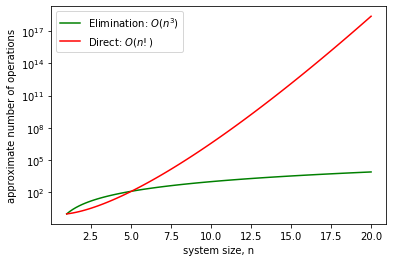

In [4]:
import matplotlib.pyplot as plt
import scipy.special as sp # for easy factorial in vectorized form

cost_elim=lambda n: n**3
cost_direct=lambda n: sp.factorial(n)

n=np.linspace(1,20,100)
plt.semilogy(n,cost_elim(n),'g',label='Elimination: $O(n^3)$')
plt.semilogy(n,cost_direct(n),'r',label='Direct: $O(n!)$')
plt.legend(loc='upper left')
plt.xlabel('system size, n')
plt.ylabel('approximate number of operations')

plt.show()

The disastrous scalability of the direct method is evident! A 100 x 100 matrix is fairly common in calculus problems (in later weeks). Naively calculating the inverse using the pen-and-paper algorithm that we learn in linear algebra classes would take over $100!\approx 10^{157}$ operations. Even with modern superfast computers, these are astronomically long times. However, Gauss elimination and related methods take roughly $100^3=1000000$ operations, which a modern laptop can easily do in a few seconds.

So, to summarize: always use elimination methods for big matrix problems. NEVER INVERT DIRECTLY. We will learn how to cleverly use elimination strategies to determine the inverse (if you needed to) in the practice problems.


<a id='exer'></a>



### Practice Problems

(1) Go back to the COVID-19 dataset from https://github.com/nytimes/covid-19-data (tutorial 2, problem 5). Extract and plot the same data as before, but now using `pandas`.

Next, use `pandas` to create dataframes of the number of cases in all states on a certain day. Plot a horizontal bar grpah to show this. Pick another day and plot this data on top of the previous one to visualize the difference between these two days on the same figure.

(2a,b,c) As described in the tutorial text, create packaged functions for Gauss elimination with and without pivoting, and the Gauss-Jordan elimination. These functions should take an $n \times n$ matrix and an $n \times 1$ column vector as input, and give the solution to the linear system as output.

Some linear systems have no solution or infinite solutions (recall Cramer's rule from linear algebra). How would you check for these cases and prevent a singular solution?

In [42]:
# Gauss without pivot

In [43]:
# Gauss with pivoting

In [44]:
# Gauss-Jordan

(3) A common matrix type that comes up in solving boundary-value problems (week 9/10) are banded systems. These matrices only have terms along specific diagonal 'bands'. The simplest is the [tridiagonal matrix](https://en.wikipedia.org/wiki/Tridiagonal_matrix), in which the only non-zero entries are along the main diagonal and the adjacent diagonal lines:
$$\begin{bmatrix} t_{00} & t_{01} &  &  & \\ t_{10}& t_{11} & t_{12} & &  \\ & t_{21} & \ddots &\ddots& \\& & \ddots & \ddots &t_{n-2,n-1} \\& &  & t_{n-1,n-2} &t_{n-1,n-1}\end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\ .\\.\\.\\ x_{n-1}  \end{bmatrix}= \begin{bmatrix} b_0 \\ b_1 \\ .\\.\\.\\ b_{n-1}  \end{bmatrix}$$

Running loops through row and columns filled mostly with zeros is inefficient, so adapt the Gauss-Jordan elimination to only have to loop through the three diagonal lines. 

_Non-coding assignment: Try to roughly estimate the computational cost of such a tridiagonal solver. How much faster would this code ideally be for a $100 \times 100$ tridiagonal matrix compared to standard Gauss-Jordan elimination_

In [45]:
# Tridiag solver

(4) How would you evaluate the inverse of a $3\times 3$ matrix using three calls to the Gauss-Jordan function. Remember that naively calculating the determinant (which is required for the 'standard' method to find the inverse) is computationally expensive. Think about what the definition of the inverse of a matrix and how it relates to the identity matrix. Could you recast this definition as three different linear systems...?

(5) Use a simple $3 \times 3$ matrix to perform every step of the Gauss-Jordan elimination manually, and keep track of how the determinant of the matrix changes with each step. Using this knowledge, how would you code a function that calculates the determinant as you go throught the elimination process?

How does row swapping (or pivoting) affect the determinant?